In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#load data
data = pd.read_csv("xclara.csv")
data.head()
X1 = data.V1.values
X2 = data.V2.values
X = np.array(list(zip(X1,X2)),dtype=np.float)
print(X)

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


In [3]:
n_centroid = 3
xmin = np.min(X1)
xmax = np.max(X1)
ymin = np.min(X2)
ymax = np.max(X2)
CX = np.random.randint(xmin,xmax-20,n_centroid)
CY = np.random.randint(ymin,ymax-20,n_centroid)
C = np.array(list(zip(CX,CY)))
print(C)

[[-18  41]
 [ 27 -19]
 [  7 -24]]


Error  66.47555941848101
Error  20.12461179749811
Error  1.7320508075688772
Error  0.0


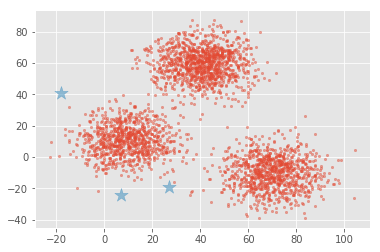

In [4]:
def dist(a,b,ax=1):
    return norm(a-b,axis=ax)

plt.scatter(X1,X2,alpha=.5,s=6);
plt.scatter(CX,CY,alpha=.5,s=200,marker='*');

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

error =  dist(C,C_old,None)

while error!=0:
    
    for i in range(len(X)):
        distance = dist(X[i],C)
        clusters[i] = np.argmin(distance)
            
    C_old = deepcopy(C)
    for i in range(n_centroid):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        #print(points)
        C[i] = np.mean(points,axis=0)
       
        
    error =  dist(C,C_old,None)
    print("Error ",error)
        

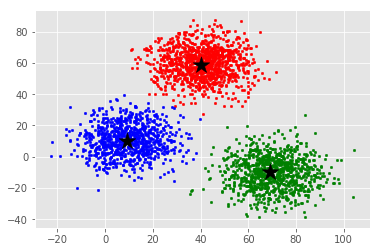

In [5]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig,ax = plt.subplots()
for i in range(n_centroid):
        points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
        ax.scatter(points[:,0],points[:,1],s=6,color = colors[i])
plt.scatter(C[:,0],C[:,1],alpha=1,s=300,marker='*',color='black');

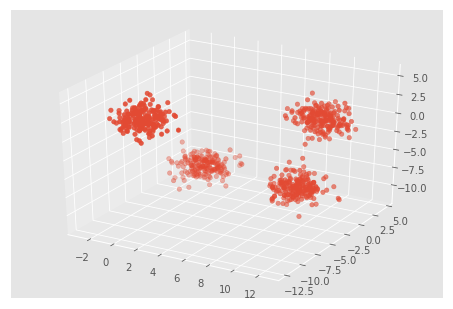

In [11]:
# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [12]:
X1,X2,X3 = X[:, 0], X[:, 1], X[:, 2]
X = np.array(list(zip(X1,X2,X3)),dtype=np.float)
print(X)

[[ 9.29267492  2.76508708  1.11087369]
 [ 1.63431807 -9.21065055  2.62858973]
 [ 0.46199194  0.20980177 -9.2459894 ]
 ...
 [-1.3629368   1.71937693 -9.23563133]
 [-0.96395445  1.75733268 -8.49764269]
 [ 7.14903539  2.15879446 -0.18937757]]


In [13]:
n_centroid = 4
xmin = np.min(X1)
xmax = np.max(X1)
ymin = np.min(X2)
ymax = np.max(X2)
zmin = np.min(X3)
zmax = np.max(X3)


CX = np.random.randint(xmin,xmax,n_centroid)
CY = np.random.randint(ymin,ymax,n_centroid)
CZ = np.random.randint(zmin,zmax,n_centroid)
C = np.array(list(zip(CX,CY,CZ)))
print(C)

[[ -1  -4  -1]
 [  4 -10  -1]
 [  7   3  -5]
 [  8 -10  -5]]


In [14]:
def dist(a,b,ax=1):
    return norm(a-b,axis=ax)

#plt.scatter(X1,X2,alpha=.5,s=6);
#plt.scatter(CX,CY,alpha=.5,s=200,marker='*');

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

error =  dist(C,C_old,None)

while error!=0:
    
    for i in range(len(X)):
        distance = dist(X[i],C)
        clusters[i] = np.argmin(distance)
            
    C_old = deepcopy(C)
    for i in range(n_centroid):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        #print(points)
        C[i] = np.mean(points,axis=0)
       
        
    error =  dist(C,C_old,None)
    print("Error ",error)
        

Error  10.954451150103322
Error  6.855654600401044
Error  0.0


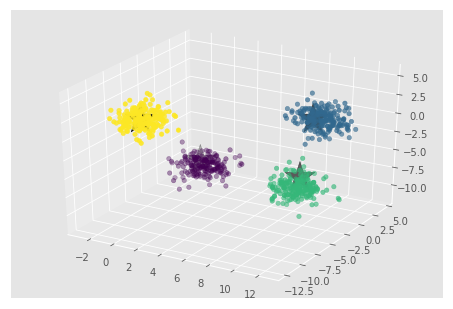

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)